# Honours Research
## 1715260

### Imports

In [1]:
import numpy as np
import typing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from pprint import pprint

%matplotlib inline

In [2]:
from data_processor import get_pct_change_train_test_split, get_credit_ratings_train_test_split
from joblib import dump, load

In [3]:
sys.path.append("/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/src/ML_training/regression")
sys.path.append("/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/")

In [4]:
sys.path

['/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/src/utils',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/venv/lib/python3.10/site-packages',
 '/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/src/ML_training/regression',
 '/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/']

### Global functions and Variables

In [5]:
columns: typing.Optional[np.array] = None
used_columns = {}
indices: typing.Optional[np.array] = []

In [6]:
def get_columns_used(indices: np.ndarray, return_ = False) -> None:
    assert len(indices) == len(columns), "indices not the same length as columns"
    if return_:
        return columns[indices]
    for column in columns[indices]:
        try:
            used_columns[column] += 1
        except KeyError:
            used_columns[column] = 1

In [7]:
def plot_indices(indices):
    indices = np.array(indices, dtype=bool)
    for index in indices:
        get_columns_used(index)
    plt.bar(range(len(used_columns)), list(used_columns.values()), align='center', tick_label=list(used_columns.keys()))
    plt.xticks(rotation="vertical")
    plt.tight_layout()
#     plt.legend()
    plt.show()

### Regression

In [8]:
from src.ML_training.base_model import BaseModel
from src.ML_training.regression.regression.huber_regression import MyHuberRegressor
from src.ML_training.regression.regression.linear_regression import MyLinearRegressor
from src.ML_training.regression.regression.sgd_classifier import MySGD
from src.ML_training.regression.trees_and_ensembles.ada_boost import ADABoostRegression
from src.ML_training.regression.trees_and_ensembles.bagging import BaggingRegression
from src.ML_training.regression.trees_and_ensembles.decision_tree import DecisionTreeRegression
from src.ML_training.regression.trees_and_ensembles.extra_tree import ExtraTreeRegression
from src.ML_training.regression.trees_and_ensembles.gradient_boosting import GradientBoostingRegression
from src.ML_training.regression.trees_and_ensembles.random_forest import RandomForestRegression
from src.ML_training.regression.trees_and_ensembles.xgb import XGBoostRegression
from src.ML_training.regression.trees_and_ensembles.xgbrf import XGBRFRegression

In [14]:
x_train, x_test, y_train, y_test, _, _, columns = get_pct_change_train_test_split()
columns = columns.drop(["change"])
for column in columns:
    print(column, end="\\\ \n-")

bookValue\\ 
-ebitPerShare\\ 
-eps\\ 
-ev\\ 
-fcfMargin\\ 
-grossMargin\\ 
-longtermDebtTotalAsset\\ 
-longtermDebtTotalCapital\\ 
-longtermDebtTotalEquity\\ 
-netDebtToTotalCapital\\ 
-netDebtToTotalEquity\\ 
-netMargin\\ 
-operatingMargin\\ 
-pb\\ 
-peTTM\\ 
-pfcfTTM\\ 
-pretaxMargin\\ 
-psTTM\\ 
-roaTTM\\ 
-roeTTM\\ 
-roicTTM\\ 
-rotcTTM\\ 
-salesPerShare\\ 
-sgaToSale\\ 
-totalDebtToEquity\\ 
-totalDebtToTotalAsset\\ 
-totalDebtToTotalCapital\\ 
-totalRatio\\ 
-cashRatio\\ 
-currentRatio\\ 
-quickRatio\\ 
-

In [10]:
models: {str, BaseModel} = {
    "LinearRegression": MyLinearRegressor(x_train, x_test, y_train, y_test),
    "HuberRegression": MyHuberRegressor(x_train, x_test, y_train, y_test),
    "SGD": MySGD(x_train, x_test, y_train, y_test),
    "XGBoostRegression": XGBoostRegression(x_train, x_test, y_train, y_test),
    "XGBRFRegression": XGBRFRegression(x_train, x_test, y_train, y_test),
    "DecisionTreeRegression": DecisionTreeRegression(x_train, x_test, y_train, y_test),
    "BaggingRegression": BaggingRegression(x_train, x_test, y_train, y_test),
    "ADABoostRegression": ADABoostRegression(x_train, x_test, y_train, y_test),
    "GradientBoostingRegression": GradientBoostingRegression(x_train, x_test, y_train, y_test),
    "ExtraTreeRegression": ExtraTreeRegression(x_train, x_test, y_train, y_test),
    "RandomForestRegression": RandomForestRegression(x_train, x_test, y_train, y_test),
}

In [11]:
with open("/home/vhutali/Desktop/projects/python/ML_finance_project_fast_api/resources/outputs/regression/regression.out") as regression_results:
    algorithms = {}
    continued: bool = False
    for line in regression_results:
        if "Testing " in line:
            algorithm = line.split(" ")[-1].replace("\n", "")
        if "Best fitness:" in line:
            fitness = line.split(" ")[-1].replace("\n", "")
        if "Best individual:" in line:
            index = line.split(":")[-1].split("[")[-1]
            continued = True
            continue
        if continued:
            if "End of testing" in line:
                if algorithm == "NN":
                    print("Skipping NN")
                    continue
                index = index.replace("\n", "").replace(" ", "").replace("[", "").replace("]", "")
                index = index.split(".")
                index.remove("")
                index = np.array(index, dtype=int)
                indices.append(index)
                index = np.array(index, dtype=bool)
                algorithms[algorithm] = [fitness, get_columns_used(index, return_ = True), index]
                continued = False
            else:
                index += line

algorithms

Skipping NN


{'LinearRegression': ['-0.03216183961835925',
  Index(['bookValue', 'ebitPerShare', 'eps', 'ev', 'longtermDebtTotalAsset',
         'longtermDebtTotalCapital', 'longtermDebtTotalEquity',
         'netDebtToTotalCapital', 'netDebtToTotalEquity', 'peTTM', 'psTTM',
         'roeTTM', 'rotcTTM', 'salesPerShare', 'totalDebtToEquity',
         'totalDebtToTotalAsset', 'totalDebtToTotalCapital', 'cashRatio'],
        dtype='object'),
  array([ True,  True,  True,  True, False, False,  True,  True,  True,
          True,  True, False, False, False,  True, False, False,  True,
         False,  True, False,  True,  True, False,  True,  True,  True,
         False,  True, False, False])],
 'HuberRegression': ['-0.032236135883078255',
  Index(['bookValue', 'ebitPerShare', 'ev', 'netDebtToTotalCapital',
         'netDebtToTotalEquity', 'pb', 'peTTM', 'psTTM', 'roaTTM', 'roicTTM',
         'salesPerShare', 'totalDebtToTotalAsset', 'totalDebtToTotalCapital'],
        dtype='object'),
  array([ True, 

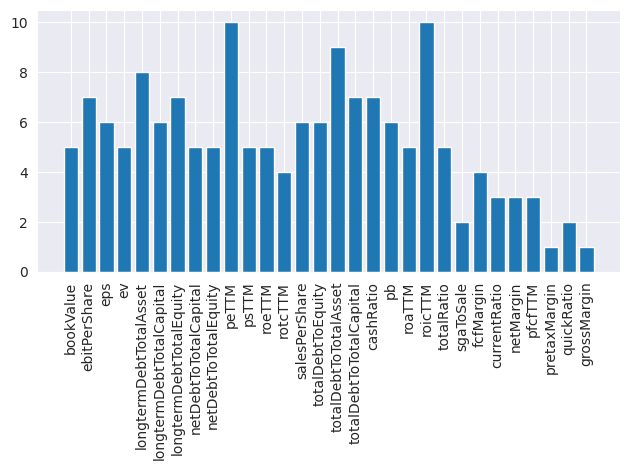

In [12]:
plot_indices(indices)

In [13]:
algorithms_df = pd.DataFrame(algorithms)
algorithms_df.rename_axis("Algorithms", axis="columns", inplace=True)
algorithms_df.rename(index={0:"training_mse", 1: "indices_used", 2: "indices_bool"}, inplace=True)
algorithms_df

Algorithms,LinearRegression,HuberRegression,SGD,XGBoostRegression,XGBRFRegression,DecisionTreeRegression,BaggingRegression,ADABoostRegression,GradientBoostingRegression,ExtraTreeRegression,RandomForestRegression
training_mse,-0.03216183961835925,-0.032236135883078255,-0.032197961888811064,-0.032186877349487934,-0.031099150527551987,-0.052340334268522457,-0.033411126462957484,-0.031188281069736243,-0.0309109987188796,-0.052574294457320585,-0.03155115766424797
indices_used,"Index(['bookValue', 'ebitPerShare', 'eps', 'ev...","Index(['bookValue', 'ebitPerShare', 'ev', 'net...","Index(['ebitPerShare', 'ev', 'longtermDebtTota...","Index(['ebitPerShare', 'longtermDebtTotalAsset...","Index(['bookValue', 'fcfMargin', 'longtermDebt...","Index(['bookValue', 'ebitPerShare', 'eps', 'ev...","Index(['eps', 'fcfMargin', 'longtermDebtTotalA...","Index(['eps', 'longtermDebtTotalAsset', 'longt...","Index(['ebitPerShare', 'eps', 'peTTM', 'roaTTM...","Index(['bookValue', 'ebitPerShare', 'ev', 'lon...","Index(['eps', 'fcfMargin', 'grossMargin', 'lon..."
indices_bool,"[True, True, True, True, False, False, True, T...","[True, True, False, True, False, False, False,...","[False, True, False, True, False, False, True,...","[False, True, False, False, False, False, True...","[True, False, False, False, True, False, True,...","[True, True, True, True, True, False, False, F...","[False, False, True, False, True, False, True,...","[False, False, True, False, False, False, True...","[False, True, True, False, False, False, False...","[True, True, False, True, False, False, True, ...","[False, False, True, False, True, True, True, ..."


In [14]:
%%time
regression_mse_results = {}
for algorithm in algorithms.items():
#     print(f"{algorithm[0]} :  {list(algorithm[1][2])}\n")
    regression_mse_results[algorithm[0]] = models[algorithm[0]].score(algorithm[1][2])
regression_mse_results

CPU times: user 3min 40s, sys: 969 ms, total: 3min 41s
Wall time: 2min 41s


{'LinearRegression': -0.03321583161978259,
 'HuberRegression': -0.03330190159744113,
 'SGD': -0.033234144605437124,
 'XGBoostRegression': -0.03311969706508842,
 'XGBRFRegression': -0.03204013513069164,
 'DecisionTreeRegression': -0.05450335923369632,
 'BaggingRegression': -0.03718294107880053,
 'ADABoostRegression': -0.032086734764124346,
 'GradientBoostingRegression': -0.03182916486670349,
 'ExtraTreeRegression': -0.06184935146055726,
 'RandomForestRegression': -0.033125440835743945}

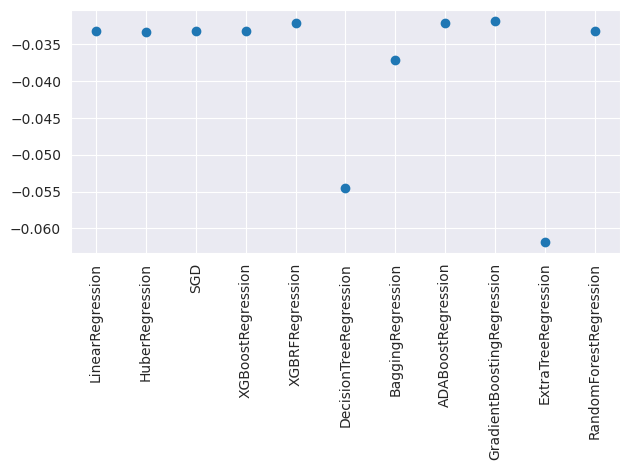

In [15]:
plt.scatter(regression_mse_results.keys(),regression_mse_results.values())
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

LinearRegression


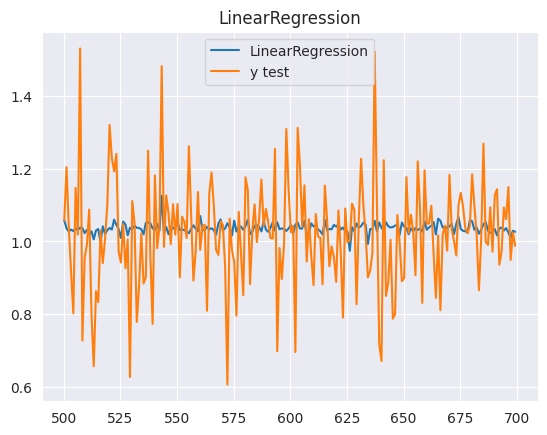

HuberRegression


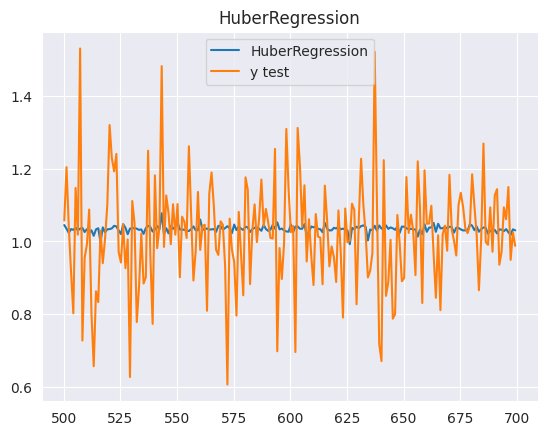

SGD


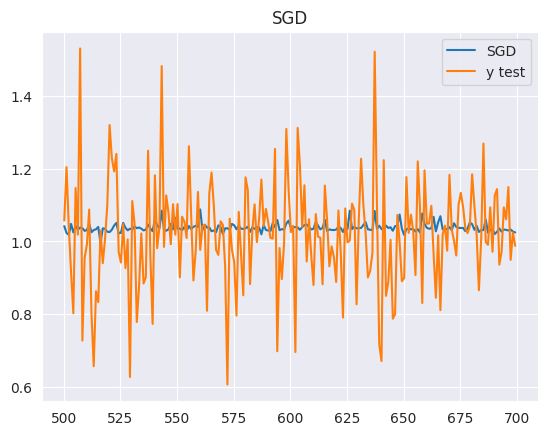

XGBoostRegression


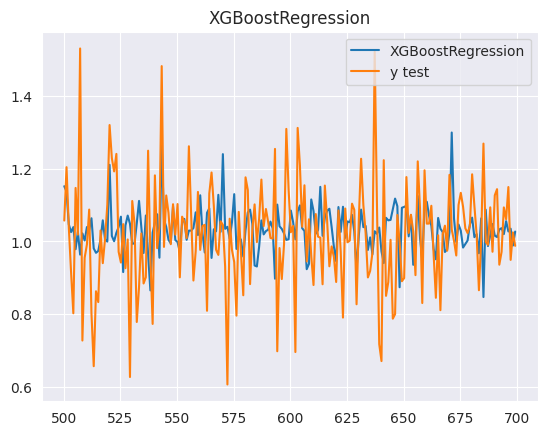

XGBRFRegression


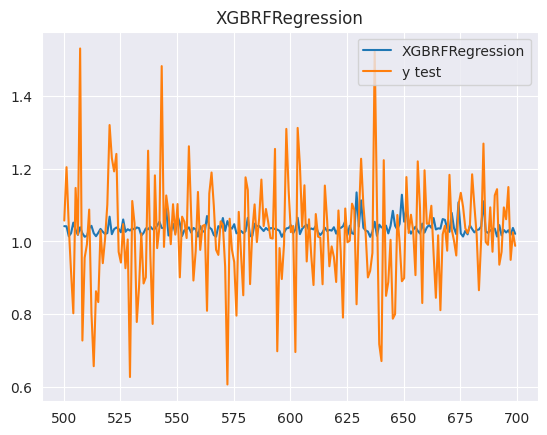

DecisionTreeRegression


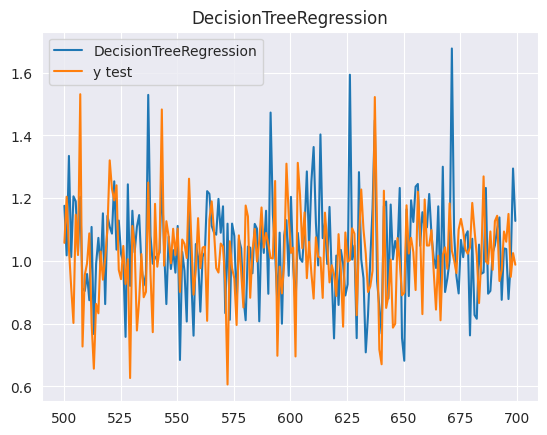

BaggingRegression


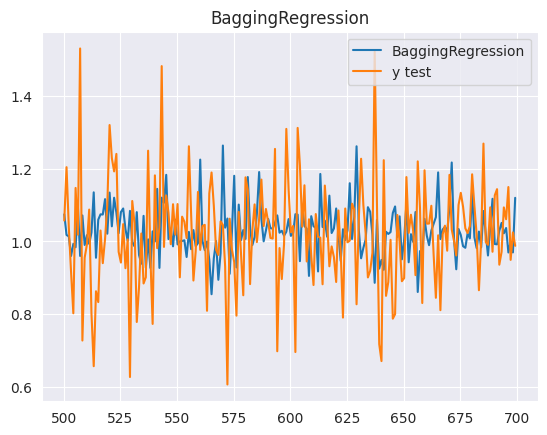

ADABoostRegression


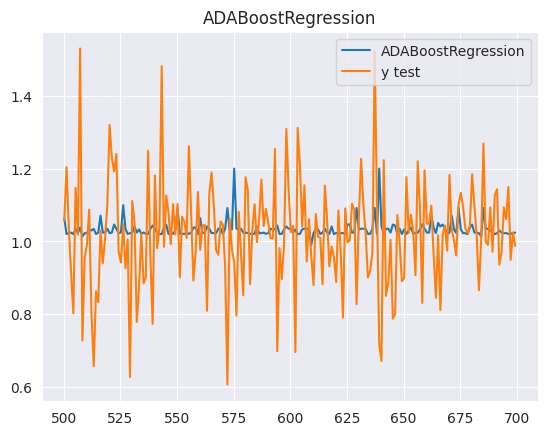

GradientBoostingRegression


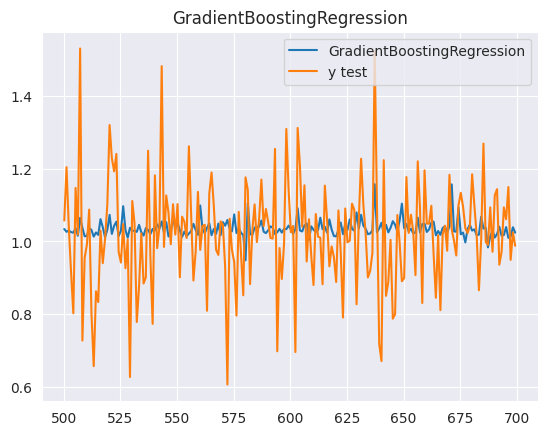

ExtraTreeRegression


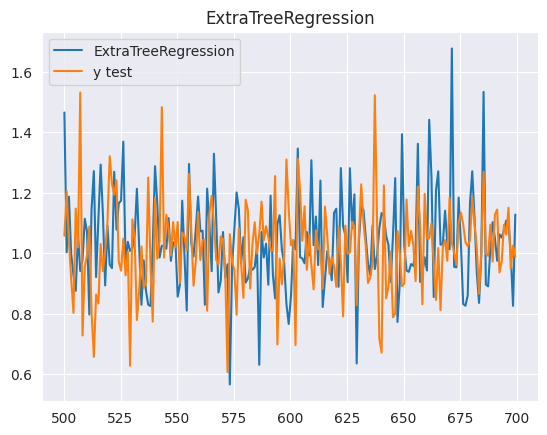

RandomForestRegression


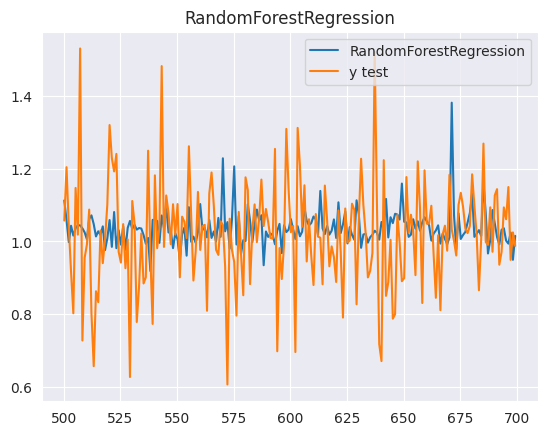

In [16]:
y_pred = {}
view_order = 1
start, end = 500,700
x = np.linspace(0, y_test.shape[0], y_test.shape[0])
for model_name, model in models.items():
    print(model_name)
#     print(model.model.predict(x_test[algorithms[model_name]])
    y_pred[model_name] = model.model.predict(x_test[:,algorithms[model_name][2]])
    view_order += 1
#     plt.subplot(len(models) + 1, 1, view_order)
    plt.plot(x[start:end], y_pred[model_name][start:end], label=model_name)
    plt.plot(x[start:end], y_test[start:end],label="y test")
    plt.legend()
    plt.title(model_name)
    plt.show()

In [32]:
from joblib import dump
for model_name, model in models.items():
    #     print(model.model.predict(x_test[algorithms[model_name]])
    y_pred[model_name] = model.model.predict(x_test[:,algorithms[model_name][2]])
    dump(model, f"{model_name}_regression.joblib")
dump({"columns": columns, "algorithms": algorithms}, "regression_columns_and_algorithms.joblib")

['regression_columns_and_algorithms.joblib']

In [31]:
algorithms

{'LinearRegression': ['-0.03216183961835925',
  Index(['bookValue', 'ebitPerShare', 'eps', 'ev', 'longtermDebtTotalAsset',
         'longtermDebtTotalCapital', 'longtermDebtTotalEquity',
         'netDebtToTotalCapital', 'netDebtToTotalEquity', 'peTTM', 'psTTM',
         'roeTTM', 'rotcTTM', 'salesPerShare', 'totalDebtToEquity',
         'totalDebtToTotalAsset', 'totalDebtToTotalCapital', 'cashRatio'],
        dtype='object'),
  array([ True,  True,  True,  True, False, False,  True,  True,  True,
          True,  True, False, False, False,  True, False, False,  True,
         False,  True, False,  True,  True, False,  True,  True,  True,
         False,  True, False, False])],
 'HuberRegression': ['-0.032236135883078255',
  Index(['bookValue', 'ebitPerShare', 'ev', 'netDebtToTotalCapital',
         'netDebtToTotalEquity', 'pb', 'peTTM', 'psTTM', 'roaTTM', 'roicTTM',
         'salesPerShare', 'totalDebtToTotalAsset', 'totalDebtToTotalCapital'],
        dtype='object'),
  array([ True, 

In [23]:
from joblib import load
joblib_model = load("XGBoostRegression_regression.joblib")

In [25]:
joblib_model.model.predict(x_test[:,algorithms["XGBoostRegression"][2]])

array([1.0421771 , 1.0551987 , 0.9162761 , ..., 0.98110545, 0.99950206,
       0.93010145], dtype=float32)

In [26]:
y_pred["XGBoostRegression"]

array([1.0421771 , 1.0551987 , 0.9162761 , ..., 0.98110545, 0.99950206,
       0.93010145], dtype=float32)

In [17]:
# TODO rename this to regression_difference_table
regression_table = pd.DataFrame(y_test - y_test)
# pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_pred["DecisionTreeRegression"]), abs(pd.DataFrame(y_test) - pd.DataFrame(y_pred["DecisionTreeRegression"]))], axis=1, ignore_index=True).sort_values(by=[2], ascending=False)
for y in y_pred.values():
    y = pd.Series(y)
    regression_table = pd.concat([regression_table, abs(y - y_test)], axis=1, ignore_index=True)
columns = ["y_test"] + list(y_pred.keys())
columns
regression_table.rename(columns=dict(enumerate(columns)), inplace=True)
regression_table

,y_test,LinearRegression,HuberRegression,SGD,XGBoostRegression,XGBRFRegression,DecisionTreeRegression,BaggingRegression,ADABoostRegression,GradientBoostingRegression,ExtraTreeRegression,RandomForestRegression
0,0.0,0.360447,0.361158,0.364558,0.354136,0.351486,0.095947,0.430963,0.304260,0.372139,0.251364,0.362880
1,0.0,0.019813,0.017525,0.018745,0.004912,0.025104,0.054034,0.010476,0.029321,0.022879,0.161596,0.036885
2,0.0,0.100194,0.105210,0.078382,0.212313,0.109034,0.078806,0.197695,0.108172,0.113014,0.160860,0.194723
3,0.0,0.220772,0.227391,0.229758,0.215684,0.231844,0.317203,0.348068,0.224468,0.245436,0.057367,0.285746
4,0.0,0.021870,0.009737,0.026484,0.011732,0.001752,0.308428,0.027377,0.027265,0.024610,0.099869,0.072502
...,...,...,...,...,...,...,...,...,...,...,...,...
2313,0.0,0.020272,0.023716,0.023398,0.062540,0.017022,0.021939,0.042555,0.026741,0.023714,0.038271,0.028679
2314,0.0,0.057451,0.057469,0.058566,0.104725,0.031886,0.085160,0.120347,0.074586,0.056407,0.038805,0.007594
2315,0.0,0.042185,0.034161,0.038503,0.016104,0.016975,0.058596,0.074565,0.023208,0.020128,0.078789,0.004050
2316,0.0,0.098922,0.101793,0.101052,0.133545,0.100245,0.177454,0.067439,0.109766,0.107110,0.075255,0.110518


In [18]:
regression_table.describe()

,y_test,LinearRegression,HuberRegression,SGD,XGBoostRegression,XGBRFRegression,DecisionTreeRegression,BaggingRegression,ADABoostRegression,GradientBoostingRegression,ExtraTreeRegression,RandomForestRegression
count,2318.0,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2.318000e+03,2318.000000,2318.000000
mean,0.0,0.124558,0.124559,0.124938,0.128478,0.123875,0.171121,0.134775,0.124631,1.240605e-01,0.179115,0.125870
std,0.0,0.133074,0.133396,0.132787,0.128920,0.129238,0.158846,0.137937,0.128690,1.282391e-01,0.172569,0.131490
min,0.0,0.000059,0.000009,0.000047,0.000042,0.000035,0.000299,0.000149,0.000041,8.232642e-07,0.000067,0.000078
25%,0.0,0.040603,0.040293,0.040826,0.042544,0.040736,0.056792,0.045678,0.040547,4.111629e-02,0.061134,0.041499
50%,0.0,0.088760,0.088598,0.089420,0.093497,0.090466,0.130950,0.096747,0.089036,8.849955e-02,0.130324,0.090665
75%,0.0,0.162407,0.163871,0.163117,0.170020,0.161895,0.236647,0.176730,0.164764,1.622435e-01,0.249692,0.164471
max,0.0,2.096165,2.096062,2.089180,1.546832,1.801416,1.675699,2.133499,1.542831,1.558235e+00,2.275709,1.938604


In [19]:
# TODO rename this to regression_difference_table
regression_pct_change_table = pd.DataFrame(y_test)
# pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_pred["DecisionTreeRegression"]), abs(pd.DataFrame(y_test) - pd.DataFrame(y_pred["DecisionTreeRegression"]))], axis=1, ignore_index=True).sort_values(by=[2], ascending=False)
for y in y_pred.values():
    y = pd.Series(y)
    regression_pct_change_table = pd.concat([regression_pct_change_table, y], axis=1, ignore_index=True)
columns = ["y_test"] + list(y_pred.keys())
columns
regression_pct_change_table.rename(columns=dict(enumerate(columns)), inplace=True)
regression_pct_change_table

,y_test,LinearRegression,HuberRegression,SGD,XGBoostRegression,XGBRFRegression,DecisionTreeRegression,BaggingRegression,ADABoostRegression,GradientBoostingRegression,ExtraTreeRegression,RandomForestRegression
0,1.396313,1.035867,1.035156,1.031755,1.042177,1.044827,1.300366,0.965350,1.092054,1.024174,1.144949,1.033433
1,1.050287,1.030474,1.032762,1.031542,1.055199,1.025183,0.996253,1.060763,1.020966,1.027408,0.888691,1.013402
2,1.128589,1.028395,1.023379,1.050206,0.916276,1.019555,1.207395,0.930894,1.020417,1.015575,0.967729,0.933865
3,1.268456,1.047684,1.041066,1.038698,1.052773,1.036612,0.951253,0.920388,1.043988,1.023021,1.211090,0.982710
4,1.034385,1.056255,1.044122,1.060869,1.046118,1.036137,1.342814,1.061763,1.061650,1.058995,1.134254,1.106887
...,...,...,...,...,...,...,...,...,...,...,...,...
2313,1.060072,1.039801,1.036357,1.036674,1.122612,1.043050,1.082011,1.017517,1.033332,1.036358,1.098344,1.031393
2314,1.091563,1.034112,1.034094,1.032997,0.986838,1.059677,1.176723,1.211910,1.016978,1.035156,1.052759,1.099157
2315,0.997209,1.039394,1.031370,1.035712,0.981105,1.014184,1.055805,1.071774,1.020417,1.017337,1.075998,0.993159
2316,1.133047,1.034125,1.031255,1.031995,0.999502,1.032802,0.955593,1.065608,1.023281,1.025937,1.057792,1.022529


In [20]:
regression_pct_change_table.describe()

,y_test,LinearRegression,HuberRegression,SGD,XGBoostRegression,XGBRFRegression,DecisionTreeRegression,BaggingRegression,ADABoostRegression,GradientBoostingRegression,ExtraTreeRegression,RandomForestRegression
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1.038532,1.035787,1.034355,1.037525,1.037676,1.036422,1.036347,1.034655,1.034269,1.035868,1.042790,1.037201
std,0.183519,0.016404,0.013949,0.015809,0.066059,0.031960,0.165914,0.069688,0.030380,0.033941,0.168979,0.048077
min,0.359626,0.943873,0.960007,0.962264,0.685270,0.968224,0.168473,0.831329,0.989528,0.784559,0.344049,0.774424
25%,0.944199,1.028319,1.030006,1.030726,1.004462,1.023376,0.942897,0.991880,1.022903,1.022783,0.949006,1.010436
50%,1.036208,1.035680,1.034202,1.035575,1.031022,1.032329,1.035269,1.031121,1.024438,1.030865,1.042140,1.032203
75%,1.122632,1.042832,1.038622,1.042106,1.062196,1.040593,1.127678,1.071527,1.035141,1.041375,1.130942,1.057082
max,3.142667,1.400653,1.494496,1.410220,1.744799,1.716728,1.939540,1.659439,1.632782,1.766937,2.087500,1.692543


In [21]:
print(models["HuberRegression"].model)

HuberRegressor(max_iter=1000)
